In [4]:
import numpy as np
import random
import math
import statistics
from copy import deepcopy
from IPython.display import display, Markdown, Latex, HTML
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Brute Force code
#### prototype of first goal only; another version has modeling of 3 separate districts and test of adjacency (had started down this path, but see the "other resources" since there are likely ways to bootstrap those existing code bases and simply add distribution visuals)


As a first goal, we want to be able to simulate the following

Brute force search for districts in toy model (rectangular map, start with 5x5)
- Using rejection sampling of units
- Starting from canonical case (stripes) and using single swaps across neighboring boundaries, followed by rejection if necessary

For both algorithms, store districts as a list
- Either using coordinates of all units, E.g. one district = [x1y1 x2y2 x3y3 x4y4 x5y5] = [11,12,13,14,15] Where xiyi are coordinates on the map
- Or using shapefile standard (which I’ve never used generatively, but obviously would be cool and generalizable beyond square grids)

For both algorithms,
- Keep track of rejection rate
- Keep track of number of new districts discovered as a function of non-rejected iteration (so we’re distinguishing rejection of illegal district from discovery of an already known district)
- Visualize?

More resources

https://districtr.org/plan (I think there is a way of utilizing this)

https://mggg.org/metagraph/5x5.html (I think there is a way of utilizing this)

https://github.com/gbroques/gerrymandering (maybe this)

https://github.com/mazore/gerrymandering

https://github.com/zschutzman/enumerator

In [ ]:


class Grid():
    
    def __init__(self, cols, rows):
        self.cols = cols
        self.rows = rows

        self.matrix = []
        for i in range(rows):
            selec_row = []
            for j in range(cols):
                selec_row.append('o')
            self.matrix.append(selec_row)
            
    def setitem(self, col, row, v): 
        self.matrix[col-1][row-1] = v

    
    def randSelect(self):
        possible_coords = [(x, y) for x in range(self.rows) for y in range(self.cols)]
        district_coords = random.sample(possible_coords, 3)#starting off with 3 for simplicity
        district_coords.sort(key=lambda tup: (tup[0],tup[1]))
        return district_coords
    
    
    def pretty_print_table(self, table):
        display(HTML(tabulate(table, tablefmt="html")))
    
    
    def raw_print(self):
        raw_print_table = []
        for i in range(self.rows):
            raw_print_row = []
            for j in range(self.cols):
                raw_print_row.append("%s"%self.matrix[i][j])
            raw_print_table.append(raw_print_row)
        display(Markdown("**Raw World Layout**"))
        self.pretty_print_table(raw_print_table)
    
        
    def new_dist_print(self):
        my_districts = self.randSelect()
        print("my random districts are: ", my_districts)
        grid_district = [(x, y) for x in range(len(self.matrix)) for y in range(len(self.matrix[0]))]
        print("grid district: ", grid_district)
        #print ("zero/zero: ", self.matrix[0][0])
        for district in my_districts: #iterate through districts
            print (district)
            if district in grid_district:
                #print ("my grid district: ", district)
                x = district[0] #get coords of district
                y = district[1]

                self.matrix[x][y] = '▉' #visualize random districts
        self.pretty_print_table(self.matrix)
        return my_districts #returns list of random set of districts
         

    def adj_cells(self):
        random_districts = self.new_dist_print()
        adj_tally = 0
        valid_district = []
        #x is 1 or -1 and y is static --> DOWN
        if (random_districts[0][0]-random_districts[1][0] == 1 or random_districts[0][0]-random_districts[1][0] == -1) and random_districts[0][1]-random_districts[1][1]==0:
            adj_tally+=1

        if (random_districts[0][0]-random_districts[2][0] == 1 or random_districts[0][0]-random_districts[2][0] == -1) and random_districts[1][1]-random_districts[2][1]==0:
            adj_tally+=1
        if (random_districts[1][0]-random_districts[2][0] == 1 or random_districts[1][0]-random_districts[2][0] == -1) and random_districts[1][1]-random_districts[2][1]==0:
            adj_tally+=1
   

    
        #X static with y incrementing up --> ACROSS
        if random_districts[0][0]-random_districts[1][0] == 0 and (random_districts[0][1]-random_districts[1][1]==1 or random_districts[0][1]-random_districts[1][1]==-1):
            adj_tally+=1
        if random_districts[0][0]-random_districts[2][0] == 0 and (random_districts[1][1]-random_districts[2][1]==1 or random_districts[1][1]-random_districts[2][1]==-1):
            adj_tally+=1
        if random_districts[1][0]-random_districts[2][0] == 0 and (random_districts[1][1]-random_districts[2][1]==1 or random_districts[1][1]-random_districts[2][1]==-1):
            adj_tally+=1
    
    
        #X and Y increment up ==> DIAGONAL
        if (random_districts[0][0]-random_districts[1][0] == 1 or random_districts[0][0]-random_districts[1][0] == -1) and (random_districts[0][1]-random_districts[1][1]==1 or random_districts[0][1]-random_districts[1][1]==-1):
            adj_tally+=1
        if (random_districts[1][0]-random_districts[2][0] == 1 or random_districts[1][0]-random_districts[2][0] == -1) and (random_districts[1][1]-random_districts[2][1]==1 or random_districts[1][1]-random_districts[2][1]==-1):
            adj_tally+=1
        if (random_districts[1][0]-random_districts[2][0] == 1 or random_districts[1][0]-random_districts[2][0] == -1) and (random_districts[1][1]-random_districts[2][1]==1 or random_districts[1][1]-random_districts[2][1]==-1):
            adj_tally+=1
    

        
        if adj_tally >=2 and len(random_districts) >0:
            valid_district.append(random_districts)
           
        print("adjacent tally is: ", adj_tally)    
        return random_districts, adj_tally, valid_district
  

In [2]:
districts_array = []
adj_array = []
valid_districts = []
unique_districts = []

In [9]:
rejection_array = []
range_cap = 1
sample_range = 10000

for sample in range(0, sample_range):
    
    for i in range(0, range_cap):
        mat = Grid(3,3)
        random_districts2, adj_count2, valid_dis2 = mat.adj_cells()
        districts_array.append(random_districts2)
        valid_districts.append(valid_dis2)
        if adj_count2 >= 2:
            adj_array.append(adj_count2)
    
    
    valid_size = 0
    for valid in valid_districts:
        if len(valid) == 0:
            valid_size
        else:
            valid_size+=1

    rejection_per = 1 - (valid_size/len(districts_array))
    rejection_array.append(rejection_per)
    
    
    print("end this loop")

#print(districts_array)
#print(valid_districts)

my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(2, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(2, 0)
(2, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(1, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (0, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(0, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 0)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 2), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 2)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 0)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 2)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 1)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(1, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 1), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(1, 1), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 1)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 2), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 2), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 2)
(1, 0)
(2, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (2, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(2, 0)
(2, 1)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(2, 0)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 1)
(2, 2)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (2, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(2, 0)
(2, 2)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(1, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 1), (0, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(0, 2)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (1, 1), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(1, 1)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 0), (0, 2), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 2)
(2, 1)


adjacent tally is:  0
end this loop
my random districts are:  [(0, 0), (1, 0), (1, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(1, 1)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 1), (1, 2), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 2)
(2, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(0, 0), (1, 0), (2, 1)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 0)
(2, 1)


adjacent tally is:  3
end this loop
my random districts are:  [(0, 1), (1, 0), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 1)
(1, 0)
(2, 2)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (0, 1), (2, 0)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(0, 1)
(2, 0)


adjacent tally is:  1
end this loop
my random districts are:  [(0, 0), (1, 1), (1, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(0, 0)
(1, 1)
(1, 2)


adjacent tally is:  2
end this loop
my random districts are:  [(1, 0), (2, 1), (2, 2)]
grid district:  [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
(1, 0)
(2, 1)
(2, 2)


adjacent tally is:  2
end this loop


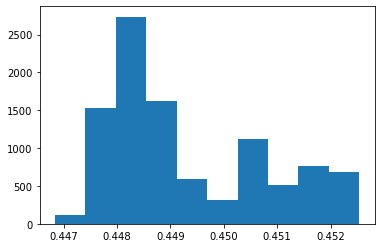

In [12]:
num_bins =10
plt.hist(rejection_array, bins = num_bins)
plt.show()